In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

from scipy.interpolate import griddata

cmap = 'PRGn'

from itertools import product

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-13 06:01:39.568156


## Global Variables

In [19]:
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]

# label = ib.mtype[:3] + ['Human'] #excluding QDA
fsize= 18

## Point-wise averaging over the grid

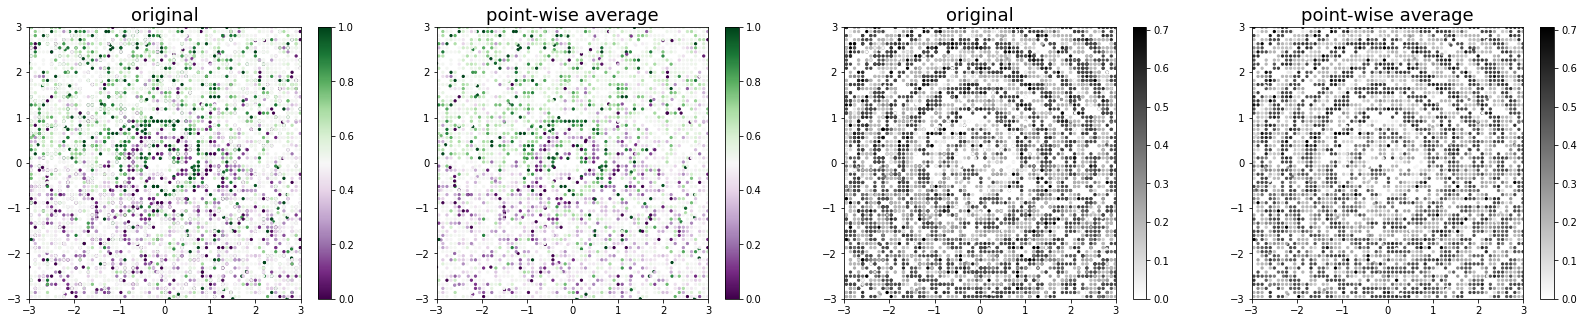

In [15]:
fig, axs = plt.subplots(1,4, figsize=(7*4,5))

tempxy1 = ib.pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]]))
tempxy2 = ib.pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,6]]))
tempxy3 = ib.pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]*0]))
tempxy4 = np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]])
tempxy5 = np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,6]])

mlp = axs[0].scatter(x=tempxy4[:,0], y=tempxy4[:,1], c=tempxy4[:,2], s=5, cmap='PRGn')
plt.colorbar(mlp, ax=axs[0])

mlp = axs[1].scatter(x=tempxy1['x'], y=tempxy1['y'], c=tempxy1['c'], s=5, cmap='PRGn')
plt.colorbar(mlp, ax=axs[1])

mlp = axs[3].scatter(x=tempxy2['x'], y=tempxy2['y'], c=tempxy2['c'], s=5, cmap='binary')
plt.colorbar(mlp, ax=axs[3])

mlp = axs[2].scatter(x=tempxy5[:,0], y=tempxy5[:,1], c=tempxy5[:,2], s=5, cmap='binary')
plt.colorbar(mlp, ax=axs[2])

# mlp = axs[3].scatter(x=tempxy3['x'], y=tempxy3['y'], c=tempxy3['c']*0, s=5, cmap='binary')
# plt.colorbar(mlp, ax=axs[3])

for i in range(4):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    if i % 2 == 0:
        axs[i].set_title('original', fontsize=fsize)
    else:
        axs[i].set_title('point-wise average', fontsize=fsize)

## Interpolation before and after point-wise averaging
Point-wise averaging shows smoother interpolation result

Text(0.5, 1.0, 'Post-averaging')

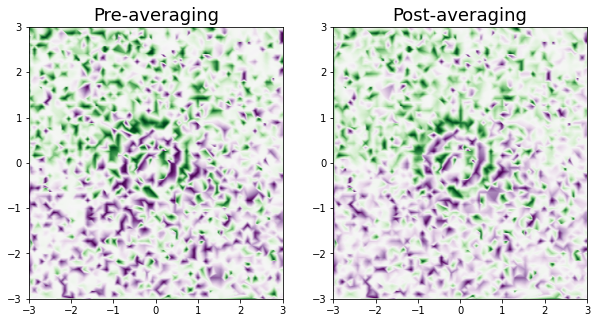

In [21]:
fig, axs= plt.subplots(1,2,figsize=(5*2,5))

grid_near = griddata((tempxy4[:,0], tempxy4[:,1]), tempxy4[:,2], (uX0, uX1), method='linear', rescale=False)
axs[0].scatter(x=uX0, y=uX1, c=grid_near, s=5, cmap='PRGn')

grid_near = griddata((tempxy1['x'], tempxy1['y']), tempxy1['c'], (uX0, uX1), method='linear', rescale=False)
axs[1].scatter(x=uX0, y=uX1, c=grid_near, s=5, cmap='PRGn')

for i in range(2):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
axs[0].set_title('Pre-averaging', fontsize=fsize)
axs[1].set_title('Post-averaging', fontsize=fsize)